In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(0)
n_pts = 100
top_reg = np.array([np.random.normal(10,2,n_pts),np.random.normal(10,2,n_pts)]).T
bot_reg = np.array([np.random.normal(5,2,n_pts),np.random.normal(5,2,n_pts)]).T
xtr = np.vstack((top_reg,bot_reg))
ytr = np.matrix(np.append(np.ones(n_pts),np.zeros(n_pts))).T


In [11]:
print('input dim',xtr.shape[1],sep=':')
print('output dim',ytr.shape[1],sep=':')



input dim:2
output dim:1


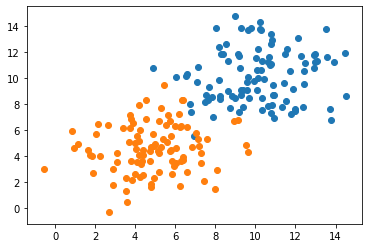

In [12]:
plt.scatter(xtr[:n_pts,0],xtr[:n_pts,1])
plt.scatter(xtr[n_pts:,0],xtr[n_pts:,1])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

For Binary (2 class classification),loss="binary_crossentropy"
For more than 2 classes , loss="categorical_crossentropy"

In [13]:
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(Adam(lr=0.03),loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
h = model.fit(xtr,ytr,epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 0s 628us/step - loss: 0.7320 - accuracy: 0.5550
Epoch 2/100
200/200 [==============================] - 0s 65us/step - loss: 0.6727 - accuracy: 0.5850
Epoch 3/100
200/200 [==============================] - 0s 75us/step - loss: 0.6163 - accuracy: 0.6150
Epoch 4/100
200/200 [==============================] - 0s 90us/step - loss: 0.5750 - accuracy: 0.6300
Epoch 5/100
200/200 [==============================] - 0s 114us/step - loss: 0.5391 - accuracy: 0.6450
Epoch 6/100
200/200 [==============================] - 0s 80us/step - loss: 0.5116 - accuracy: 0.7050
Epoch 7/100
200/200 [==============================] - 0s 105us/step - loss: 0.4891 - accuracy: 0.8100
Epoch 8/100
200/200 [==============================] - 0s 95us/step - loss: 0.4657 - accuracy: 0.8600
Epoch 9/100
200/200 [==============================] - 0s 110us/step - loss: 0.4593 - accuracy: 0.7500
Epoch 10/100
200/200 [==============================] - 0s 75us/step - loss: 0

Epoch 80/100
200/200 [==============================] - 0s 80us/step - loss: 0.1447 - accuracy: 0.9650
Epoch 81/100
200/200 [==============================] - 0s 70us/step - loss: 0.1435 - accuracy: 0.9650
Epoch 82/100
200/200 [==============================] - 0s 75us/step - loss: 0.1418 - accuracy: 0.9650
Epoch 83/100
200/200 [==============================] - 0s 95us/step - loss: 0.1443 - accuracy: 0.9650
Epoch 84/100
200/200 [==============================] - 0s 110us/step - loss: 0.1413 - accuracy: 0.9650
Epoch 85/100
200/200 [==============================] - 0s 80us/step - loss: 0.1391 - accuracy: 0.9650
Epoch 86/100
200/200 [==============================] - 0s 80us/step - loss: 0.1384 - accuracy: 0.9650
Epoch 87/100
200/200 [==============================] - 0s 75us/step - loss: 0.1433 - accuracy: 0.9600
Epoch 88/100
200/200 [==============================] - 0s 80us/step - loss: 0.1383 - accuracy: 0.9650
Epoch 89/100
200/200 [==============================] - 0s 85us/step - l

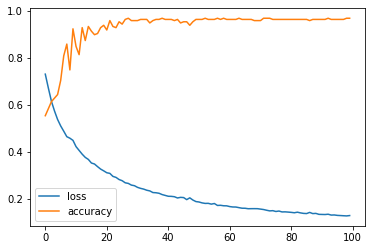

In [16]:
plt.plot(h.history['loss'],label= 'loss')
plt.plot(h.history['accuracy'],label= 'accuracy')
plt.legend()
plt.show()

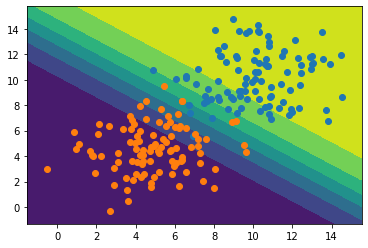

In [17]:
x_max ,x_min = xtr[:,0].max()+1, xtr[:,0].min()-1
y_max , y_min = xtr[:,1].max()+1, xtr[:,1].min()-1
xx,yy = np.meshgrid(np.linspace(x_min,x_max),(np.linspace(y_min,y_max)))
grid = np.c_[xx.ravel(),yy.ravel()]
pred = model.predict(grid).reshape(xx.shape)
plt.contourf(xx,yy,pred)
plt.scatter(xtr[:n_pts,0],xtr[:n_pts,1])
plt.scatter(xtr[n_pts:,0],xtr[n_pts:,1])
plt.show()